In [1]:
import sqlite3

# Create or connect to database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sample_data = [
    ('Apple', 10, 20.5),
    ('Banana', 5, 10.0),
    ('Apple', 3, 20.5),
    ('Orange', 7, 15.0),
    ('Banana', 8, 10.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()
conn.close()


In [2]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect("sales_data.db")

# SQL to get total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Load query result into DataFrame
df = pd.read_sql_query(query, conn)
print(df)
conn.close()


  product  total_qty  revenue
0   Apple         13    266.5
1  Banana         13    130.0
2  Orange          7    105.0


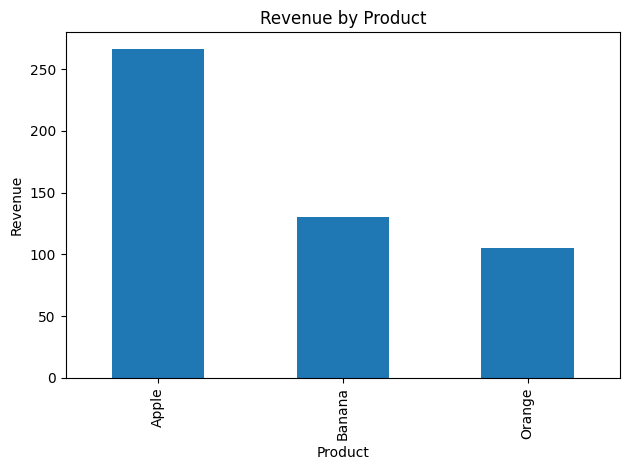

In [3]:
import matplotlib.pyplot as plt

# Plot bar chart for revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
